In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [7]:
# Load your dataset (make sure filename is correct)
df = pd.read_csv("Dataset .csv")

# Show first 5 rows
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [9]:
# Show column names
print("Columns:", df.columns)


Columns: Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [10]:
# Keep only needed columns
df = df[['Aggregate rating', 'Votes', 'Average Cost for two', 'City', 'Cuisines']]

# Drop missing values
df.dropna(inplace=True)

# Remove rows with zero rating
df = df[df['Aggregate rating'] > 0]

# Encode categorical features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])
df['Cuisines'] = le.fit_transform(df['Cuisines'])

# Show cleaned data
print(df.head())


   Aggregate rating  Votes  Average Cost for two  City  Cuisines
0               4.8    314                  1100    73       870
1               4.5    591                  1200    73      1053
2               4.4    270                  4000    75      1577
3               4.9    365                  1500    75      1068
4               4.8    229                  1500    75      1064


<ipython-input-10-565bd62b652c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [12]:
# Define features (X) and target (y)
X = df[['Votes', 'Average Cost for two', 'City', 'Cuisines']]
y = df['Aggregate rating']

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict using the test data
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared Score (R2):", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 0.2643297809840325
R-squared Score (R2): 0.14628159985770584


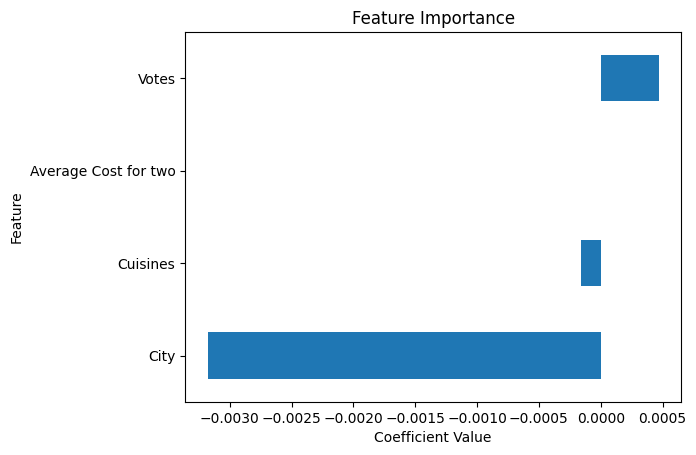

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a bar chart of feature importance
coefficients = pd.Series(model.coef_, index=X.columns)

# Plot
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()
